In [26]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# for handling imbalancing
from imblearn.under_sampling import NearMiss
from keras.utils import np_utils

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix

import keras
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization

# for learning rate decay
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,MaxPooling2D, Flatten, Dropout, BatchNormalization, AveragePooling2D
from tensorflow.keras.optimizers import SGD
# Scaler
from sklearn.preprocessing import StandardScaler


In [3]:
# Read data
df = pd.read_csv('A_Z Handwritten Data.csv')

In [4]:
print(df['0'])

0          0
1          0
2          0
3          0
4          0
          ..
372445    25
372446    25
372447    25
372448    25
372449    25
Name: 0, Length: 372450, dtype: int64


In [5]:
# Data preprocessing
y = df['0']
del df['0']

In [6]:
x = y.replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25], ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='count'>

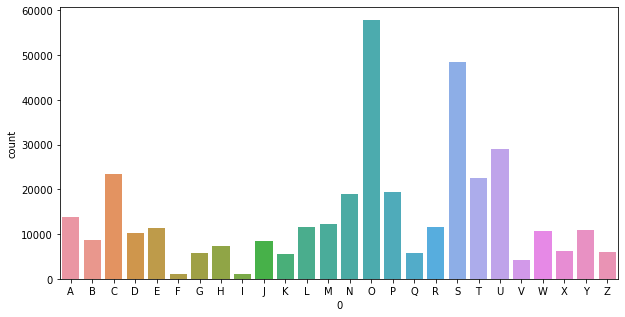

In [7]:
plt.figure(figsize = (10,5))
sns.countplot(x)

In [8]:
nM = NearMiss()
X_data, y_data = nM.fit_resample(df, y)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='count'>

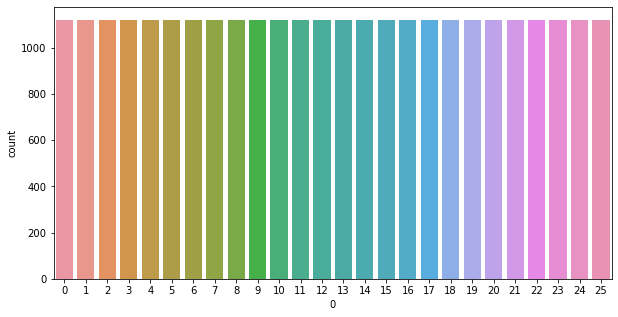

In [9]:
plt.figure(figsize = (10,5))
sns.countplot(y_data)

In [10]:
#One-Hot-Encoding of the target.
y = np_utils.to_categorical(y_data)
# Define the classification of 26 alphabets.
num_classes = y.shape[1]
num_classes

26

In [11]:
# Normalize data
scaler = StandardScaler()
X_data = scaler.fit_transform(X_data)
X_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

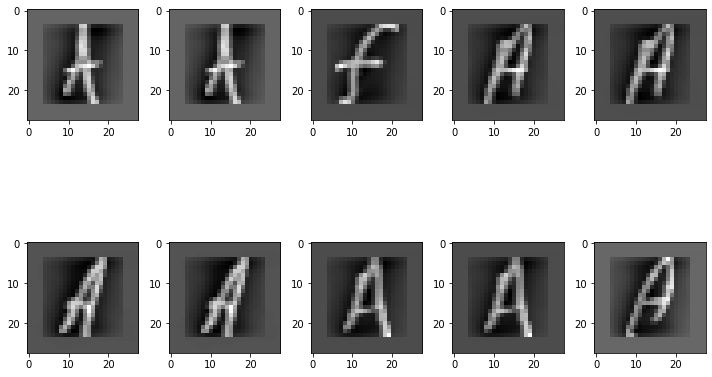

In [12]:
X_data = X_data.reshape(-1,28,28,1)
# Showing few images

f, ax = plt.subplots(2,5)
f.set_size_inches(10,10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(X_data[k].reshape(28,28), cmap='gray')
        k += 1
    plt.tight_layout()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2 ,random_state=1024)

In [42]:
# Classic Lenet architecture
Lenet = Sequential()
Lenet.add(Conv2D(6,(5,5), activation='sigmoid', input_shape=(28,28,1)))
Lenet.add(AveragePooling2D(pool_size=(2, 2)))
Lenet.add(Conv2D(16,(5, 5), activation='sigmoid'))
Lenet.add(AveragePooling2D(pool_size=(2, 2)))
Lenet.add(Flatten())
Lenet.add(Dense(units=120, activation='relu'))
Lenet.add(Dense(units=84, activation='relu'))
Lenet.add(Dense(num_classes, activation = 'softmax'))
Lenet.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])


In [43]:
print(Lenet.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d_10 (Avera  (None, 12, 12, 6)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_19 (Conv2D)          (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_11 (Avera  (None, 4, 4, 16)         0         
 gePooling2D)                                                    
                                                                 
 flatten_7 (Flatten)         (None, 256)               0         
                                                                 
 dense_21 (Dense)            (None, 120)              

In [44]:
Lenet_history = Lenet.fit(X_train,y_train,epochs=15, batch_size=128, validation_data=(X_test,y_test))

Epoch 1/15
182/182 [==============================] - 3s 15ms/step - loss: 1.4223 - accuracy: 0.5687 - val_loss: 0.5328 - val_accuracy: 0.8360
Epoch 2/15
182/182 [==============================] - 3s 15ms/step - loss: 0.3654 - accuracy: 0.8916 - val_loss: 0.3053 - val_accuracy: 0.9133
Epoch 3/15
182/182 [==============================] - 3s 14ms/step - loss: 0.2365 - accuracy: 0.9287 - val_loss: 0.2180 - val_accuracy: 0.9382
Epoch 4/15
182/182 [==============================] - 3s 14ms/step - loss: 0.1756 - accuracy: 0.9481 - val_loss: 0.2204 - val_accuracy: 0.9397
Epoch 5/15
182/182 [==============================] - 3s 15ms/step - loss: 0.1417 - accuracy: 0.9570 - val_loss: 0.1710 - val_accuracy: 0.9518
Epoch 6/15
182/182 [==============================] - 3s 15ms/step - loss: 0.1205 - accuracy: 0.9635 - val_loss: 0.1515 - val_accuracy: 0.9609
Epoch 7/15
182/182 [==============================] - 3s 15ms/step - loss: 0.1010 - accuracy: 0.9694 - val_loss: 0.1477 - val_accuracy: 0.9614

In [45]:
scores = Lenet.evaluate(X_test,y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

CNN Error: 2.82%


In [14]:
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
#Choose an optimizer and compile the model.
model.compile(optimizer = Adam(learning_rate = 0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])
#And print the summary of the model.
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 26)                3354      
                                                                 
Total params: 594,138
Trainable params: 594,138
Non-trainable params: 0
__________________________________________________

In [15]:
history = model.fit(X_train,y_train,epochs=15, batch_size=128, validation_data=(X_test,y_test))

Epoch 1/15
182/182 [==============================] - 4s 19ms/step - loss: 0.6240 - accuracy: 0.8383 - val_loss: 0.3098 - val_accuracy: 0.9195
Epoch 2/15
182/182 [==============================] - 3s 19ms/step - loss: 0.2525 - accuracy: 0.9399 - val_loss: 0.2776 - val_accuracy: 0.9284
Epoch 3/15
182/182 [==============================] - 3s 19ms/step - loss: 0.2849 - accuracy: 0.9399 - val_loss: 0.1782 - val_accuracy: 0.9552
Epoch 4/15
182/182 [==============================] - 4s 19ms/step - loss: 0.0879 - accuracy: 0.9763 - val_loss: 0.1410 - val_accuracy: 0.9700
Epoch 5/15
182/182 [==============================] - 4s 21ms/step - loss: 0.0496 - accuracy: 0.9850 - val_loss: 0.1364 - val_accuracy: 0.9720
Epoch 6/15
182/182 [==============================] - 4s 20ms/step - loss: 0.0317 - accuracy: 0.9895 - val_loss: 0.1412 - val_accuracy: 0.9732
Epoch 7/15
182/182 [==============================] - 3s 17ms/step - loss: 0.0449 - accuracy: 0.9862 - val_loss: 0.1447 - val_accuracy: 0.9708

In [16]:
scores = model.evaluate(X_test,y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

CNN Error: 4.33%


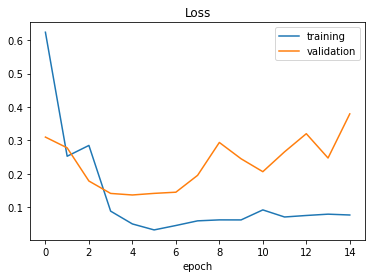

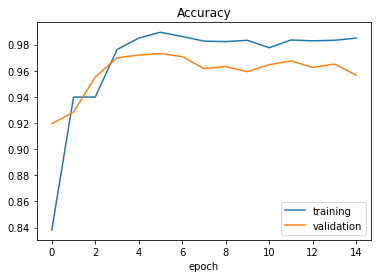

In [17]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show()

In [18]:
model2 = Sequential()
model2.add(Conv2D(64, (5, 5), input_shape=(28, 28, 1), activation='relu', padding="same"))
model2.add(Conv2D(64, (5, 5), input_shape=(28, 28, 1), activation='relu',padding="same"))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
model2.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
model2.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
model2.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.2))

model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(num_classes, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        1664      
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        102464    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 128)       147584    
                                                      

In [20]:
history2 = model2.fit(X_train,y_train,epochs=15, batch_size=128, validation_data=(X_test,y_test))

Epoch 1/15
182/182 [==============================] - 108s 594ms/step - loss: 0.3093 - accuracy: 0.9133 - val_loss: 0.1573 - val_accuracy: 0.9579
Epoch 2/15
182/182 [==============================] - 103s 565ms/step - loss: 0.1623 - accuracy: 0.9531 - val_loss: 0.1970 - val_accuracy: 0.9504
Epoch 3/15
182/182 [==============================] - 106s 582ms/step - loss: 0.1416 - accuracy: 0.9629 - val_loss: 0.1024 - val_accuracy: 0.9741
Epoch 4/15
182/182 [==============================] - 106s 583ms/step - loss: 0.0714 - accuracy: 0.9790 - val_loss: 0.0841 - val_accuracy: 0.9785
Epoch 5/15
182/182 [==============================] - 107s 589ms/step - loss: 0.0551 - accuracy: 0.9825 - val_loss: 0.0748 - val_accuracy: 0.9820
Epoch 6/15
182/182 [==============================] - 118s 648ms/step - loss: 0.0438 - accuracy: 0.9868 - val_loss: 0.0932 - val_accuracy: 0.9777
Epoch 7/15
182/182 [==============================] - 107s 589ms/step - loss: 0.0593 - accuracy: 0.9821 - val_loss: 0.0849 -

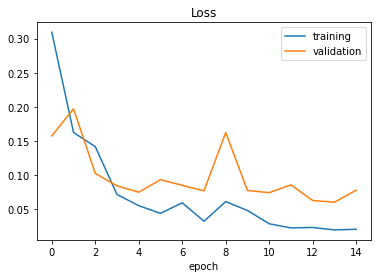

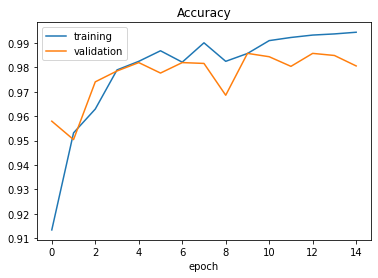

In [21]:
plt.figure(1)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show()

In [22]:
scores = model2.evaluate(X_test,y_test, verbose=1)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

182/182 [==============================] - 6s 35ms/step - loss: 0.0778 - accuracy: 0.9806
CNN Error: 1.94%
